# Analysis part - Blastoise___Holo_1999_Base_Set

In [2]:
library(ggplot2)
library(quantreg)


df = read.csv('lagged_merged_datasets_final/merged_Blastoise___Holo_1999_Base_Set.csv')

#convert prices to returns
grades <- grep("grade[0-9]+price", names(df), value = TRUE)
grade_returns <- sapply(grades, function(x) paste0(x, "_return"))

for(grade in grades) {
  df[paste(grade, "return", sep = "_")] <- c(NA, diff(log(df[[grade]])))
}

# Convert adjclosestock and adjclosebond (including their lags) to returns
stock_bond_cols <- grep("adjclose(stock|bond)(lag[0-9]+)?", names(df), value = TRUE)

for(col in stock_bond_cols) {
  df[paste0(col, "_return")] <- c(NA, diff(log(df[[col]])))
}

# Remove rows with NA in the newly created return columns
df <- na.omit(df)

head(df)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'quantreg' was built under R version 3.6.3"Loading required package: SparseM
Warning message:
"package 'SparseM' was built under R version 3.6.3"
Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



,date,grade5price,grade6price,grade7price,grade8price,grade9price,grade10price,adjclosestock,volume,adjclosebond,...,adjclosestocklag2_return,adjclosebondlag2_return,adjclosestocklag3_return,adjclosebondlag3_return,adjclosestocklag4_return,adjclosebondlag4_return,adjclosestocklag5_return,adjclosebondlag5_return,adjclosestocklag6_return,adjclosebondlag6_return
2,2016-10-01,10,18.25,25.0,48.95125,76.0000,222.5,2126.15,72915530000,2.589,...,-0.001219987,0.022208040,0.034990433,-0.05570609,0.0009105066,-0.13065558,0.0152083668,-0.01397565,0.0026957615,0.01740491
3,2016-11-01,10,18.25,25.0,29.51750,76.0000,222.5,2198.81,88445380000,3.017,...,-0.001235214,0.045990159,-0.001219987,0.02220804,0.0349904327,-0.05570609,0.0009105066,-0.13065558,0.0152083668,-0.01397565
4,2016-12-01,10,24.99,25.0,26.72000,39.6200,222.5,2238.83,75344550000,3.063,...,-0.019616837,0.102831645,-0.001235214,0.04599016,-0.0012199868,0.02220804,0.0349904327,-0.05570609,0.0009105066,-0.13065558
5,2017-01-01,10,24.99,20.5,31.00000,78.4175,192.5,2278.87,70576420000,3.051,...,0.033603545,0.152991251,-0.019616837,0.10283165,-0.0012352137,0.04599016,-0.0012199868,0.02220804,0.0349904327,-0.05570609
6,2017-02-01,10,24.99,20.5,23.25000,55.9920,151.0,2363.64,69260940000,2.968,...,0.018037111,0.015131869,0.033603545,0.15299125,-0.0196168370,0.10283165,-0.0012352137,0.04599016,-0.0012199868,0.02220804
7,2017-03-01,10,24.99,20.5,24.50000,76.5120,151.0,2362.72,81664010000,3.018,...,0.017726315,-0.003925372,0.018037111,0.01513187,0.0336035450,0.15299125,-0.0196168370,0.10283165,-0.0012352137,0.04599016


                               volume   volumelag1   volumelag2   volumelag3
volume                    1.000000000  0.511526427  0.465953672  0.458130896
volumelag1                0.511526427  1.000000000  0.542365905  0.467936136
volumelag2                0.465953672  0.542365905  1.000000000  0.560340232
volumelag3                0.458130896  0.467936136  0.560340232  1.000000000
volumelag4                0.245731174  0.456241293  0.479605854  0.555694203
volumelag5                0.231990510  0.248717761  0.465167201  0.481185871
volumelag6                0.227594475  0.239359154  0.244997401  0.467641136
grade5price_return       -0.052140916  0.058059979  0.008642237  0.027058832
grade6price_return       -0.063027895  0.108623561  0.068766103  0.060067968
grade7price_return       -0.111629776  0.133119234 -0.036731137  0.092909128
grade8price_return        0.040392737  0.024074397  0.038289521  0.077774705
grade9price_return        0.118711787 -0.057101251  0.075945823  0.054543945

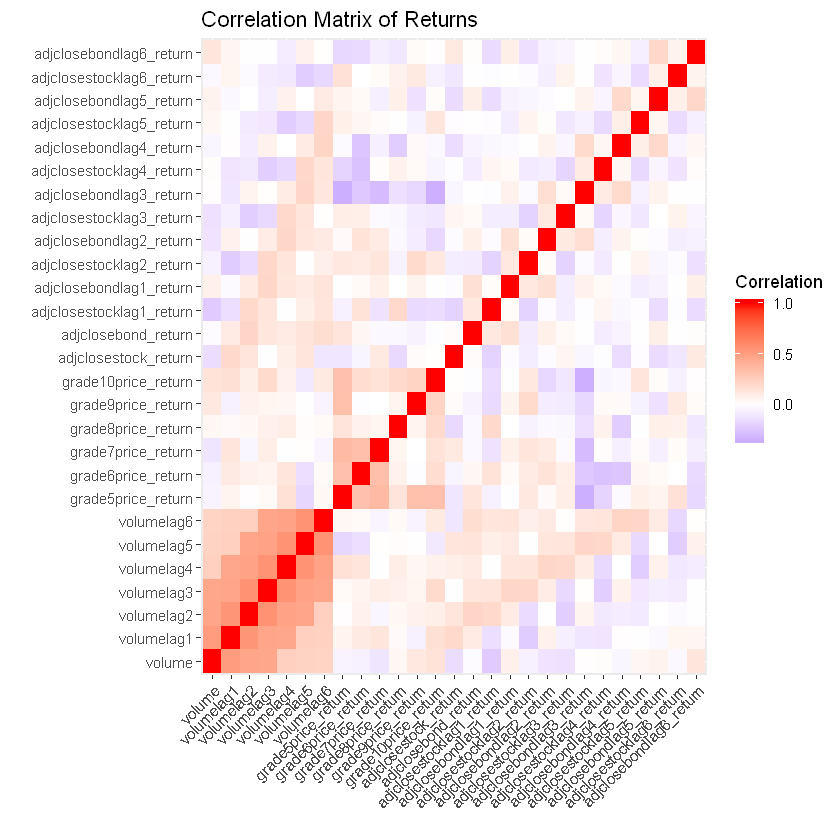

In [19]:
createReturnsCorrelationMatrix <- function(df) {
  # Load necessary libraries
  library(ggplot2)
  library(reshape2)
  
  # Use a simplified pattern to include both "_return" columns and any "volume" columns
  pattern <- "_return|volume"
  selected_columns <- grep(pattern, names(df), value = TRUE)
  
  # Calculate the correlation matrix for the selected columns
  correlation_matrix <- cor(df[, selected_columns], use = "complete.obs")
  
  # Print the correlation matrix to the console
  print(correlation_matrix)
  
  # Melt the correlation matrix for visualization
  melted_correlation_matrix <- melt(correlation_matrix)
  
  # Create the ggplot object for the correlation matrix
  plot <- ggplot(data = melted_correlation_matrix, aes(x=Var1, y=Var2, fill=value)) +
    geom_tile() +
    scale_fill_gradient2(midpoint=0, low="blue", high="red", mid="white") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x='', y='', title='Correlation Matrix of Returns', fill='Correlation')
  
  # Explicitly print the ggplot object to ensure it's displayed
  print(plot)
  
  # Return the correlation matrix as well
  return(correlation_matrix)
}

# Assuming your adjusted dataset is in 'df'
# Example usage:
correlation_matrix <- createReturnsCorrelationMatrix(df)


## VAR model - try later - if enough time...

In [4]:
#install.packages('vars', type = 'binary')
library(vars)

# Assuming 'data_var_subset' is a dataframe with the relevant variables for VAR model
data_var_subset <- df[c("grade10price", "adjclosestock")]

# Determine optimal number of lags
var1.select <- VARselect(data_var_subset, lag.max=6, type="const")
var1.select$selection

# Once you have the optimal number of lags, you can fit the VAR model
#optimal_lags <- var1.select$selection["AIC"]  # Choosing based on AIC, for example
#var_model <- VAR(data_var_subset, p=optimal_lags, type="const")

# Now, 'var_model' contains your fitted VAR model with the optimal lag length


Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'



The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

## Visualisation

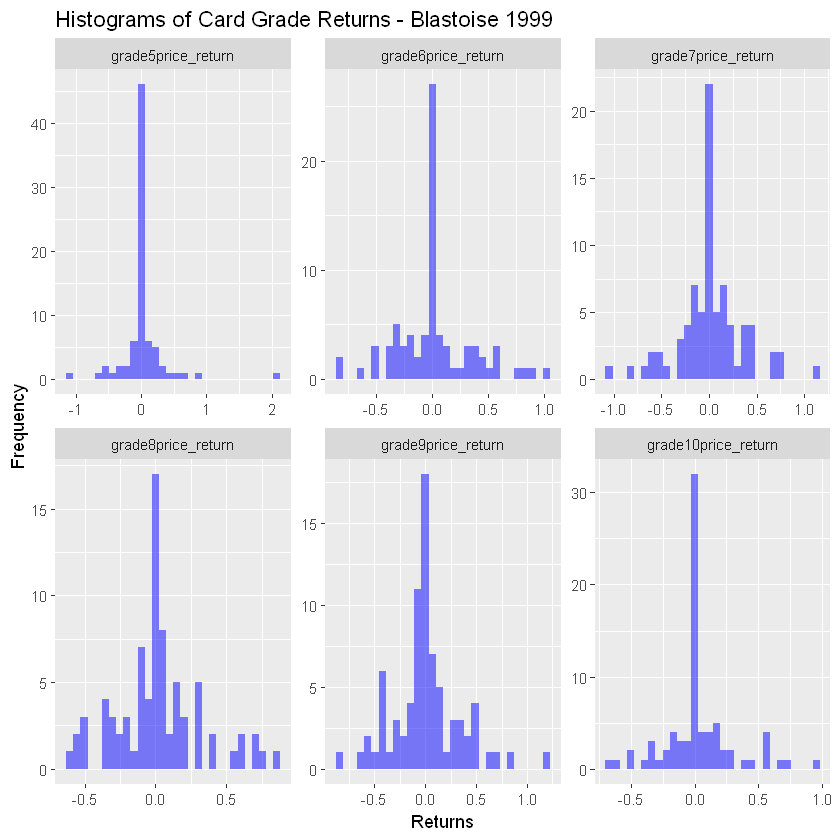

In [5]:

#create a long format data frame suitable for faceting with returns
long_df <- reshape2::melt(df, id.vars = "date", measure.vars = grade_returns)

#histograms for card grade returns
p1 <- ggplot(long_df, aes(x = value)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.5) +
  facet_wrap(~ variable, scales = "free") +
  labs(x = "Returns", y = "Frequency", title = "Histograms of Card Grade Returns - Blastoise 1999")

print(p1)

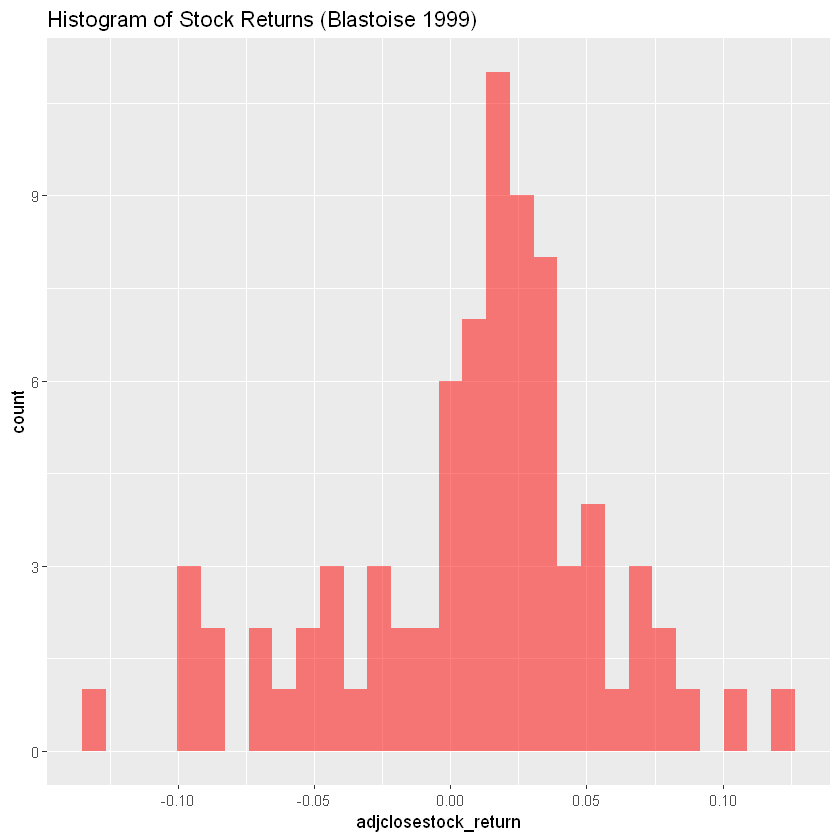

In [6]:
#histogram of stock returns
p2 <- ggplot(df, aes(x = adjclosestock_return)) +
  geom_histogram(bins = 30, fill = "red", alpha = 0.5) +
  labs(title = "Histogram of Stock Returns (Blastoise 1999)")

print(p2)

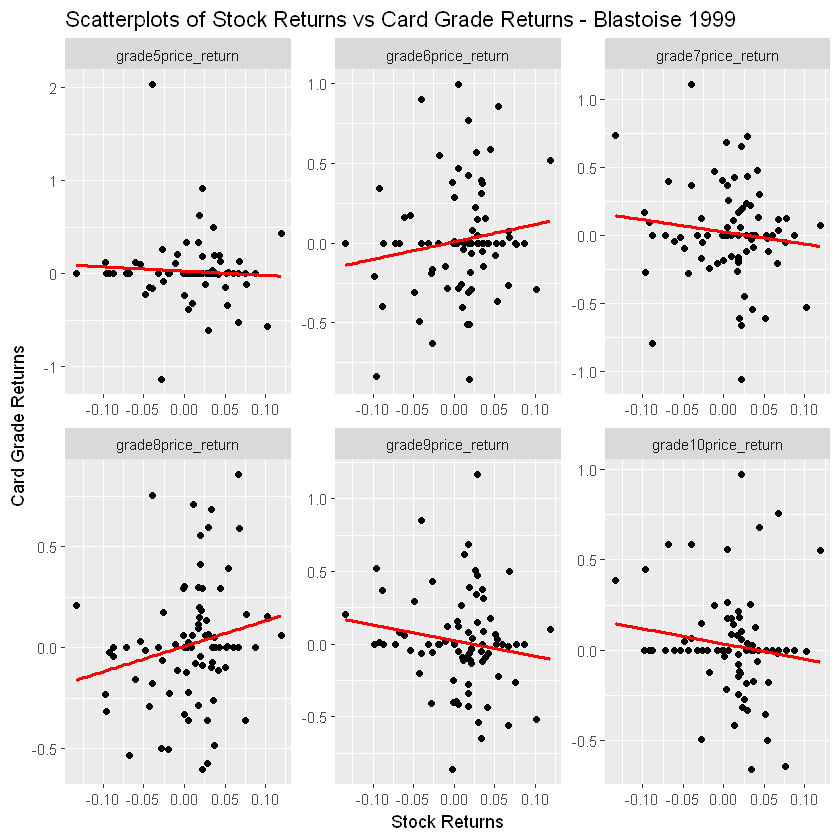

In [18]:
#a long format data frame suitable for scatterplots with returns
long_df <- reshape2::melt(df, id.vars = c("date", "adjclosestocklag1_return"), measure.vars = grade_returns) #ADJUST FOR DIFFERENT LAGS

#scatterplots between stock returns and card grades returns
p3 <- ggplot(long_df, aes(x = adjclosestocklag1_return, y = value)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  facet_wrap(~ variable, scales = "free") +
  labs(x = "Stock Returns", y = "Card Grade Returns", title = "Scatterplots of Stock Returns vs Card Grade Returns - Blastoise 1999")

print(p3)

## Choose the variables using AIC

In [26]:

# Load necessary library
library(stats)

# Preparing the initial full model with the dependent variable (choosing one of the grade prices as an example)
# and all potential independent variables (using returns and lagged returns)
# Note: Adjust 'grade5price' to the specific grade price return you are analyzing
full_model <- lm(grade10price_return ~ adjclosestock_return + adjclosebond_return +
                 adjclosestocklag1_return + adjclosebondlag1_return +
                 adjclosestocklag2_return + adjclosebondlag2_return +
                 adjclosestocklag3_return + adjclosebondlag3_return +
                 adjclosestocklag4_return + adjclosebondlag4_return +
                 adjclosestocklag5_return + adjclosebondlag5_return +
                 adjclosestocklag6_return + adjclosebondlag6_return +
                 volume + volumelag1 + volumelag2 + volumelag3 + 
                 volumelag4 + volumelag5 + volumelag6, data = df)

# Perform backward elimination based on AIC
reduced_model <- step(full_model, direction = "backward")

# Display the summary of the reduced model to see the selected variables and their coefficients
summary(reduced_model)


Start:  AIC=-183.23
grade10price_return ~ adjclosestock_return + adjclosebond_return + 
    adjclosestocklag1_return + adjclosebondlag1_return + adjclosestocklag2_return + 
    adjclosebondlag2_return + adjclosestocklag3_return + adjclosebondlag3_return + 
    adjclosestocklag4_return + adjclosebondlag4_return + adjclosestocklag5_return + 
    adjclosebondlag5_return + adjclosestocklag6_return + adjclosebondlag6_return + 
    volume + volumelag1 + volumelag2 + volumelag3 + volumelag4 + 
    volumelag5 + volumelag6

                           Df Sum of Sq    RSS     AIC
- adjclosebondlag5_return   1   0.00013 4.4511 -185.23
- adjclosebondlag4_return   1   0.00047 4.4515 -185.22
- volumelag1                1   0.00057 4.4516 -185.22
- adjclosebondlag1_return   1   0.00088 4.4519 -185.21
- adjclosestocklag2_return  1   0.00091 4.4519 -185.21
- adjclosebond_return       1   0.00357 4.4546 -185.17
- adjclosebondlag6_return   1   0.00375 4.4547 -185.16
- adjclosestocklag3_return  1   0.00719


Call:
lm(formula = grade10price_return ~ adjclosestocklag1_return + 
    adjclosebondlag3_return + volumelag3 + volumelag5 + volumelag6, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73684 -0.11682  0.00178  0.11863  0.89044 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)              -2.404e-01  1.817e-01  -1.323  0.18983   
adjclosestocklag1_return -1.097e+00  6.073e-01  -1.807  0.07488 . 
adjclosebondlag3_return  -1.038e+00  3.387e-01  -3.066  0.00304 **
volumelag3                3.946e-12  2.032e-12   1.942  0.05604 . 
volumelag5               -3.856e-12  2.183e-12  -1.766  0.08155 . 
volumelag6                3.251e-12  2.131e-12   1.525  0.13155   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2554 on 73 degrees of freedom
Multiple R-squared:  0.2293,	Adjusted R-squared:  0.1765 
F-statistic: 4.344 on 5 and 73 DF,  p-value: 0.001623


## Models

### OLS

In [67]:
#OLS
ols_model <- lm(grade10price_return ~ adjclosestocklag1_return + 
    adjclosebondlag3_return + log(volumelag3)  , data = df) 

print(summary(ols_model))

library(car)

# Calculate VIF
vif_result <- vif(ols_model)
print(vif_result)

library(lmtest)

# Perform the Breusch-Pagan test
bp_test <- bptest(ols_model)

# Print the test results
print(bp_test)



Call:
lm(formula = grade10price_return ~ adjclosestocklag1_return + 
    adjclosebondlag3_return + log(volumelag3), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74879 -0.11544  0.00362  0.10559  0.89234 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)               -7.2267     4.1598  -1.737  0.08645 . 
adjclosestocklag1_return  -1.0015     0.6166  -1.624  0.10850   
adjclosebondlag3_return   -1.1364     0.3355  -3.387  0.00113 **
log(volumelag3)            0.2891     0.1654   1.747  0.08466 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2606 on 75 degrees of freedom
Multiple R-squared:  0.1754,	Adjusted R-squared:  0.1424 
F-statistic: 5.317 on 3 and 75 DF,  p-value: 0.002238

adjclosestocklag1_return  adjclosebondlag3_return          log(volumelag3) 
                1.016533                 1.001760                 1.017718 

	studentized Breusch-Pagan test

data

### Quantile regression

In [69]:
#Quantile regression
library(quantreg)

quantile_model <- rq(grade10price_return ~ adjclosestocklag1_return + adjclosebondlag3_return + log(volumelag3) , data = df, tau = seq(from=0.05, to=0.95, by=0.05))  #change tau for different quantiles
                                                                                                                                   

#print summary of quantile regression models
for(grade_return in grade_returns) {
  #print(paste("Summary of quantile regression model for:", grade_return))
  #print(summary(quantile_models[[grade_return]]))
}

#uncomment the last two commented rows (in the previous loop) if you want to see the results for quantiles from 0.05 to 0.95, by 0.05 step




#### Results for different quantiles of the grade 10 prices x OLS estimates (red line) 

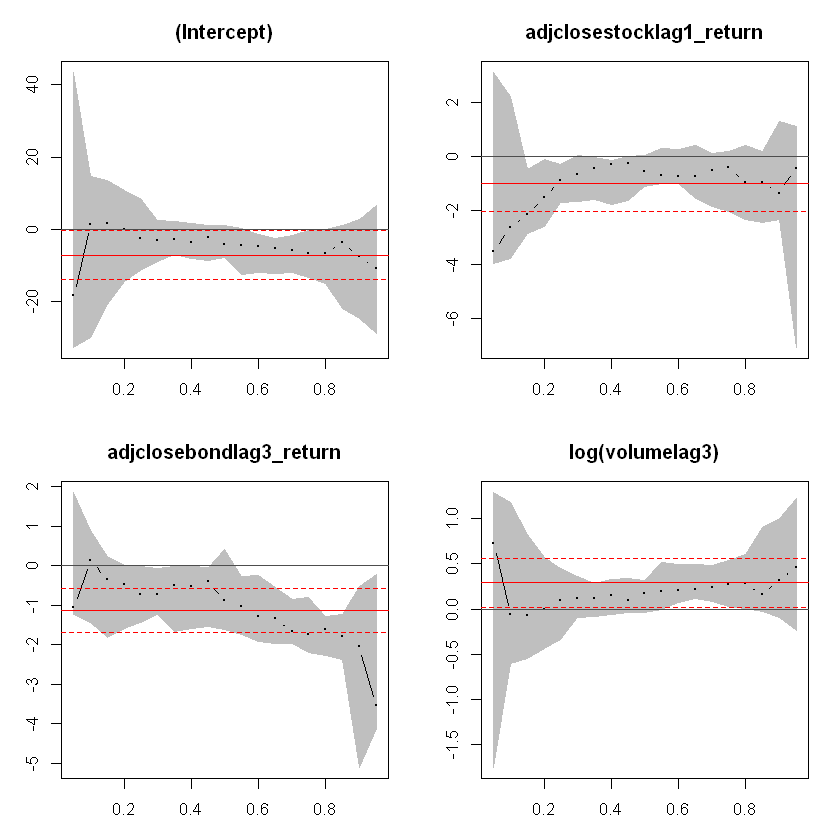

In [72]:

plot(summary(quantile_model))
